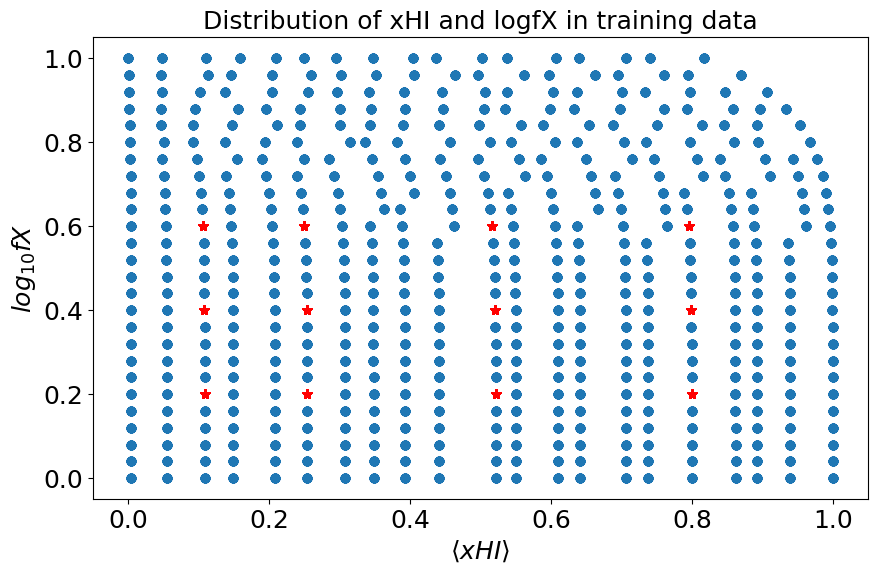

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import f21_predict_base as base

# Load the CSV file
data = pd.read_csv('./output/f21_ps_xgb_train_test_uGMRT_t500h_b1_20250109112442/all_training_data.csv')

# Extract the last two columns
xHI = data.iloc[:, -2]
logfX = data.iloc[:, -1]

base.initplt()
# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Create a joint plot to show the distribution and concentration
ax.set_title('Distribution of xHI and logfX in training data')
ax.set_xlabel(r'$\langle xHI\rangle$')
ax.set_ylabel(r'$log_{10}fX$')
#plt.colorbar(label='Density', ax=ax)
ax.scatter(xHI, logfX, label="Training point")

## Test points
data = pd.read_csv('./output/f21_ps_xgb_train_test_uGMRT_t500h_b1_20250109112442/all_test_data.csv')
# Extract the last two columns
xHI = data.iloc[:, -2]
logfX = data.iloc[:, -1]

ax.scatter(xHI, logfX, marker='*', color='red', label="Test point")
plt.legend()
plt.show()

In [17]:
training_data = pd.read_csv('./output/f21_predict_bispec_train_test_uGMRT_t500.0_20250111114452/all_training_data.csv',header=None)
test_data = pd.read_csv('./output/f21_predict_bispec_train_test_uGMRT_t500.0_20250111114452/all_test_data.csv',header=None)
print(f"training_data shape:{training_data.shape}")
print(f"test_data shape:{test_data.shape}")


training_data shape:(20880, 22)
test_data shape:(12000, 22)


plot the mean value of each column in training_data where the value in column 21 is between 0.51 and 0.53 and the value in column 22 is between 0.59 and 0.61

filtered_training_data shape:(80, 22)
              0          1          2          3          4          5   \
10600  99.735496  99.671670  99.495684  99.646907  99.593446  99.542142   
10608  99.459213  99.452240  99.688139  99.829268  99.700866  99.730585   
10616  99.726335  99.396129  99.659947  99.806917  99.876528  99.880307   
10624  99.506021  99.545085  99.802093  99.784380  99.633644  99.600005   
10632  99.646873  99.372600  99.858210  99.703954  99.695988  99.761288   

              6          7          8          9   ...         12         13  \
10600  99.414402  99.632134  99.531373  99.448348  ...  99.610720  99.568729   
10608  99.559877  99.534580  99.467436  99.709193  ...  99.442381  99.361676   
10616  99.646175  99.769252  99.718533  99.633851  ...  99.767089  99.696748   
10624  99.671744  99.378851  99.722388  99.575640  ...  99.694621  99.820265   
10632  99.476404  99.533671  99.389105  99.574341  ...  99.185233  99.494123   

              14         15   

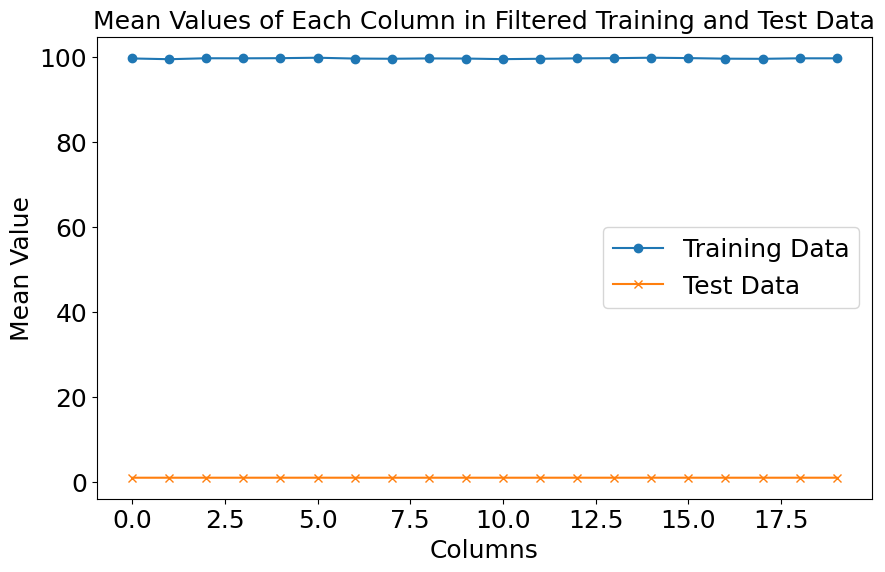

In [18]:

# Filter the training data based on the specified conditions
filtered_training_data = training_data[(training_data.iloc[:, 20].between(0.24, 0.26)) & 
                                        (training_data.iloc[:, 21].between(0.14, 0.26))]

print(f"filtered_training_data shape:{filtered_training_data.shape}")
print(filtered_training_data.head())
# Calculate the mean of each column in the filtered training data
mean_training_values = filtered_training_data.mean()

# Filter the test data based on the same conditions
filtered_test_data = test_data[(test_data.iloc[:, 20].between(0.24, 0.26)) & 
                                (test_data.iloc[:, 21].between(0.14, 0.26))]
print(f"filtered_test_data shape:{filtered_test_data.shape}")
print(filtered_test_data.head())
# Calculate the mean of each column in the filtered test data
mean_test_values = filtered_test_data.mean()
print(f"Mean training params: {mean_training_values[20:22]}")
print(f"Mean testing params: {mean_test_values[20:22]}")
# Plot the mean values for both training and test data
plt.figure(figsize=(10, 6))
mean_training_values[:20].plot(kind='line', label='Training Data', marker='o')
mean_test_values[:20].plot(kind='line', label='Test Data', marker='x')
plt.title('Mean Values of Each Column in Filtered Training and Test Data')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.legend()
plt.show()